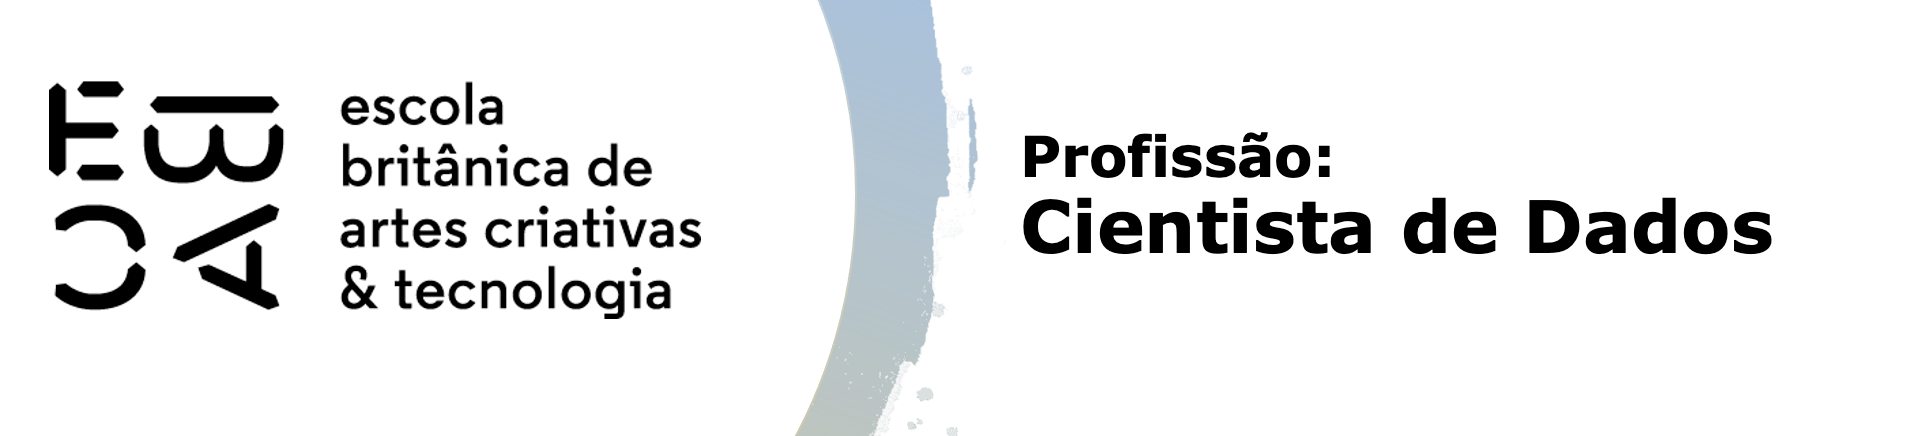

# Tarefa

In [3]:
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

In [4]:
pg = sns.load_dataset('penguins')

In [5]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

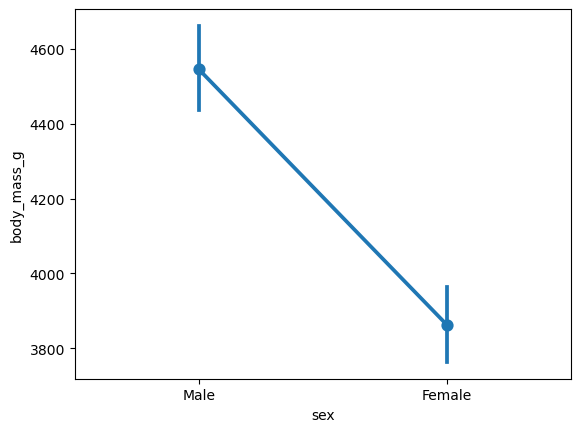

In [6]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [8]:
desvpad = pg.groupby('sex')['body_mass_g'].var().mean()**0.5

# Calcular as médias para machos e fêmeas
media_A = pg.groupby('sex')['body_mass_g'].mean()['Male']
media_B = pg.groupby('sex')['body_mass_g'].mean()['Female']

# Calcular a diferença
diferenca = media_A - media_B  # Numerador da fórmula

# Calcular o erro padrão
n_A = len(pg[pg['sex'] == 'Male']['body_mass_g'].dropna())
n_B = len(pg[pg['sex'] == 'Female']['body_mass_g'].dropna())
erro_padrao = desvpad * ((1/n_A + 1/n_B) ** 0.5)  # raiz( (s1^2/n1) + (s2^2/n2) )

# Estatística do teste
t = diferenca / erro_padrao

# Graus de liberdade
df = n_A + n_B - 2

# Região crítica
RC = st.t.ppf(0.95, df)  # 95% de confiança para um teste unilateral

# Valor-p
p_value = 1 - st.t.cdf(t, df)  # p-value para o teste unilateral

# Exibir resultados
print(f'diferença: {diferenca:.2f}')
print(f'desvio padrão: {desvpad:.2f}')
print(f'erro padrão: {erro_padrao:.2f}')
print(f'estatística do teste: {t:.2f}')
print(f'região crítica: {RC:.2f} ou mais')
print(f'p-value: {p_value:.5f} ou mais')

diferença: 683.41
desvio padrão: 729.43
erro padrão: 79.95
estatística do teste: 8.55
região crítica: 1.65 ou mais
p-value: 0.00000 ou mais


## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

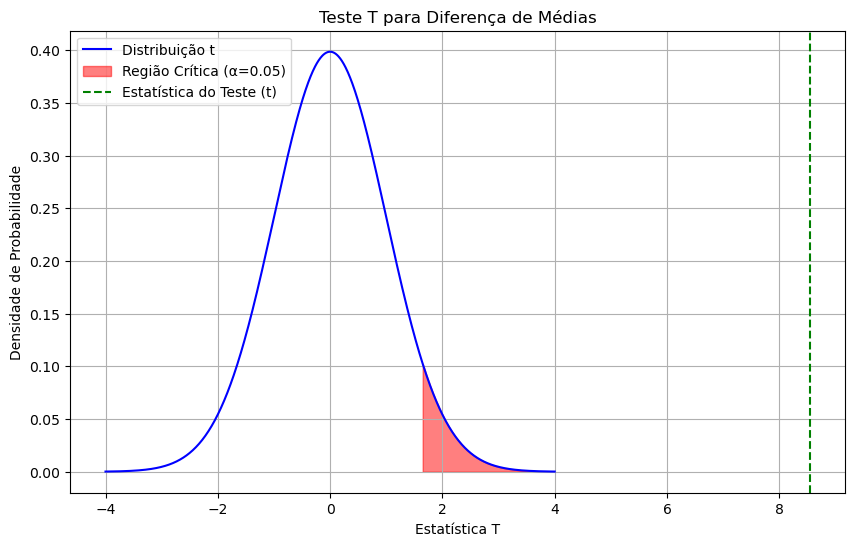

In [11]:
# Valores para a distribuição t
x = np.linspace(-4, 4, 1000)
y = st.t.pdf(x, df)

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição t', color='blue')

# Preencher a região crítica
x_fill = np.linspace(RC, 4, 1000)
y_fill = st.t.pdf(x_fill, df)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label='Região Crítica (α=0.05)')

# Adicionar a estatística do teste
plt.axvline(t, color='green', linestyle='--', label='Estatística do Teste (t)')

# Configurações do gráfico
plt.title('Teste T para Diferença de Médias')
plt.xlabel('Estatística T')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid()

# Mostrar o gráfico
plt.show()

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [35]:
#Adelie

adelie_data = pg[pg['species'] == 'Adelie']

# Calcular desvio padrão e médias por sexo
desvio_padrao = adelie_data.groupby('sex')['body_mass_g'].std().mean()
media_por_sexo = adelie_data.groupby('sex')['body_mass_g'].mean()

media_masculina = media_por_sexo['Male']
media_feminina = media_por_sexo['Female']

# Calcular a diferença, erro padrão, estatística do teste e p-value
diferenca = media_masculina - media_feminina
erro_padrao = desvio_padrao * (2 / 10) ** 0.5
t_estatistica = diferenca / erro_padrao
regiao_critica = st.t.ppf(0.95, 18)
p_value = 1 - st.t.cdf(t_estatistica, 18)

# Função para imprimir resultados
def imprimir_resultados():
    print(f'Diferença: {diferenca:.2f}')
    print(f'Desvio padrão: {desvio_padrao:.2f}')
    print(f'Erro padrão: {erro_padrao:.2f}')
    print(f'Estatística do teste: {t_estatistica:.2f}')
    print(f'Região crítica: {regiao_critica:.2f} ou mais')
    print(f'p-value: {p_value:.5f} ou mais')

imprimir_resultados()

# Armazenar p-value
p_value_adelie = p_value

Diferença: 674.66
Desvio padrão: 308.10
Erro padrão: 137.78
Estatística do teste: 4.90
Região crítica: 1.73 ou mais
p-value: 0.00006 ou mais


In [37]:
#Chinstrap
chinstrap_data = pg[pg['species'] == 'Chinstrap']

# Calcular desvio padrão e médias por sexo
desvio_padrao = chinstrap_data.groupby('sex')['body_mass_g'].std().mean()
media_por_sexo = chinstrap_data.groupby('sex')['body_mass_g'].mean()

media_masculina = media_por_sexo['Male']
media_feminina = media_por_sexo['Female']

# Calcular a diferença, erro padrão, estatística do teste e p-value
diferenca = media_masculina - media_feminina
erro_padrao = desvio_padrao * (2 / 10) ** 0.5
t_estatistica = diferenca / erro_padrao
regiao_critica = st.t.ppf(0.95, 18)
p_value = 1 - st.t.cdf(t_estatistica, 18)

# Função para imprimir resultados
def imprimir_resultados_chinstrap():
    print(f'Diferença: {diferenca:.2f}')
    print(f'Desvio padrão: {desvio_padrao:.2f}')
    print(f'Erro padrão: {erro_padrao:.2f}')
    print(f'Estatística do teste: {t_estatistica:.2f}')
    print(f'Região crítica: {regiao_critica:.2f} ou mais')
    print(f'p-value: {p_value:.5f} ou mais')

imprimir_resultados_chinstrap()

# Armazenar p-value
p_value_chinstrap = p_value


Diferença: 411.76
Desvio padrão: 323.74
Erro padrão: 144.78
Estatística do teste: 2.84
Região crítica: 1.73 ou mais
p-value: 0.00538 ou mais


In [41]:
#Gentoo
gentoo_data = pg[pg['species'] == 'Gentoo']

# Calcular desvio padrão e médias por sexo
desvio_padrao = gentoo_data.groupby('sex')['body_mass_g'].std().mean()
media_por_sexo = gentoo_data.groupby('sex')['body_mass_g'].mean()

media_masculina = media_por_sexo['Male']
media_feminina = media_por_sexo['Female']

# Calcular a diferença, erro padrão, estatística do teste e p-value
diferenca = media_masculina - media_feminina
erro_padrao = desvio_padrao * (2 / 10) ** 0.5
t_estatistica = diferenca / erro_padrao
regiao_critica = st.t.ppf(0.95, 18)
p_value = 1 - st.t.cdf(t_estatistica, 18)

# Função para imprimir resultados
def imprimir_resultados_gentoo():
    print(f'Diferença: {diferenca:.2f}')
    print(f'Desvio padrão: {desvio_padrao:.2f}')
    print(f'Erro padrão: {erro_padrao:.2f}')
    print(f'Estatística do teste: {t_estatistica:.2f}')
    print(f'Região crítica: {regiao_critica:.2f} ou mais')
    print(f'p-value: {p_value:.5f} ou mais')

imprimir_resultados_gentoo()

# Armazenar p-value
p_value_gentoo = p_value


Diferença: 805.09
Desvio padrão: 297.37
Erro padrão: 132.99
Estatística do teste: 6.05
Região crítica: 1.73 ou mais
p-value: 0.00001 ou mais


In [43]:
# Função para imprimir p-values das espécies
def imprimir_p_values(p_value_adelie, p_value_chinstrap, p_value_gentoo):
    print(f'Adelie P-value: {p_value_adelie:.5f}')
    print(f'Chinstrap P-value: {p_value_chinstrap:.5f}')
    print(f'Gentoo P-value: {p_value_gentoo:.5f}')

# Chamar a função para imprimir os p-values
imprimir_p_values(p_value_adelie, p_value_chinstrap, p_value_gentoo)


Adelie P-value: 0.00006
Chinstrap P-value: 0.00538
Gentoo P-value: 0.00001
